In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# Notebook options
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

# Import our input dataset
charity_df = pd.read_csv('resources/charity_data.csv')
charity_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Check for Null values
charity_df.isnull().sum()

EIN                       0
NAME                      0
APPLICATION_TYPE          0
AFFILIATION               0
CLASSIFICATION            0
USE_CASE                  0
ORGANIZATION              0
STATUS                    0
INCOME_AMT                0
SPECIAL_CONSIDERATIONS    0
ASK_AMT                   0
IS_SUCCESSFUL             0
dtype: int64

# Data Cleaning 
## bucketing, onehot encoder, normalizing, removing statistically insignificant data

In [3]:
# Data exploration, bucketing, onehot, labelencoder

charity_categorical = charity_df.dtypes[charity_df.dtypes == 'object'].index.to_list()
charity_categorical.remove('NAME')
charity_df[charity_categorical].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [4]:
# Drop Special considerations and STATUS

print(charity_df.SPECIAL_CONSIDERATIONS.value_counts())
print(charity_df.STATUS.value_counts())

charity_df.drop(columns=['SPECIAL_CONSIDERATIONS'], inplace=True)
charity_categorical.remove('SPECIAL_CONSIDERATIONS')

charity_df.drop(columns=['STATUS'], inplace=True)

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64
1    34294
0        5
Name: STATUS, dtype: int64


In [5]:
#bucket application_type and classification

APPLICATION_TYPE_counts = charity_df['APPLICATION_TYPE'].value_counts()

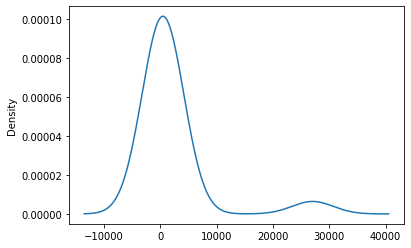

In [6]:
APPLICATION_TYPE_counts.plot.density()

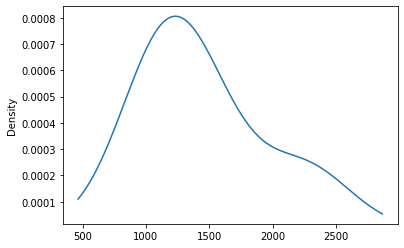

In [7]:
# Group APPLICATION_TYPE_counts less than 500 
# Get app types
to_replace = APPLICATION_TYPE_counts[APPLICATION_TYPE_counts < 1000].index

# Loop through apps that are to be replaced, replacing in charity_df
for app in to_replace:
    charity_df.APPLICATION_TYPE = charity_df.APPLICATION_TYPE.replace(app, 'Other')
    
APPLICATION_TYPE_counts2 = charity_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE_counts2.drop('T3', inplace=True) # drop large outlier for density plot
APPLICATION_TYPE_counts2.plot.density()

In [8]:
# bin CLASSIFICATION
CLASSIFICATION_counts = charity_df.CLASSIFICATION.value_counts()

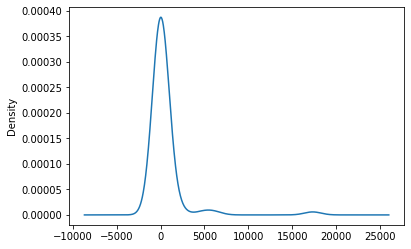

In [9]:
CLASSIFICATION_counts.plot.density()

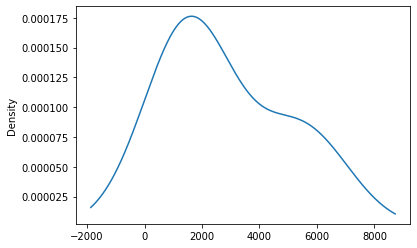

In [10]:
# Bin under 500
# Get names to replace
to_replace = CLASSIFICATION_counts[CLASSIFICATION_counts < 500].index

for classification in to_replace:
    charity_df.CLASSIFICATION = charity_df.CLASSIFICATION.replace(classification, 'Other')
    
CLASSIFICATION_counts2 = charity_df.CLASSIFICATION.value_counts()
CLASSIFICATION_counts2
CLASSIFICATION_counts2.drop('C1000', inplace=True) # drop largest outlier
CLASSIFICATION_counts2.plot.density()

In [11]:
# One Hot encoder,  label encoding

enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(charity_df[charity_categorical]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(charity_categorical)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [12]:
charity_df = charity_df.merge(encode_df, left_index=True, right_index=True)
charity_df.drop(columns=charity_categorical, inplace=True)
charity_df.head()

,EIN,NAME,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Separate Identification columns into charity_names df, remove identification cols from charity_df

charity_names = charity_df[['EIN', 'NAME']]
charity_df.drop(columns=['EIN', 'NAME'], inplace=True)
charity_df.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# separate into training and testing data
y = charity_df.IS_SUCCESSFUL
X = charity_df.drop(columns=['IS_SUCCESSFUL'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, stratify=y)

In [15]:
# Scale the data with StandardScaler
scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
for i in range(1,4):
    print(i)

1
2
3


# Hyperparameter testing

### Number of hidden layers hyperparameter testing

In [23]:
# Define the model
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  int(number_input_features/2)
hidden_nodes_layer2 = int(hidden_nodes_layer1/2)
hidden_nodes_layer3 = int(hidden_nodes_layer1/2)
hidden_nodes_layer4 = int(hidden_nodes_layer1/2)

nn = tf.keras.models.Sequential()


# Num hidden layers test



for i in range(1,5):
    # First hidden layer
    nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
    print('first layer and activation')
    
    if i > 1:
        # Second hidden layer
        nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
        print('2nd layer added')
        
    if i > 2:
        # third hidden layer
        nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))
        print('third layer added')
    
    if i > 3:
        # third hidden layer
        nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))
        print('fourth layer added')
    
    # Output layer
    nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the Sequential model together and customize metrics
    nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

    # Train the model
    fit_model = nn.fit(X_train_scaled, y_train, epochs=25, verbose=0)

    # Evaluate the model using the test data
    model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
    
    print('\n-----------------------\n')

# Two or Three Layers

first layer and activation
8575/8575 - 0s - loss: 0.5543 - acc: 0.7317
Loss: 0.5543355776269652, Accuracy: 0.7316617965698242
/n-----------------------/n
first layer and activation
2nd layer added
8575/8575 - 0s - loss: 0.5545 - acc: 0.7325
Loss: 0.5544807198930413, Accuracy: 0.732478141784668
/n-----------------------/n
first layer and activation
2nd layer added
third layer added
8575/8575 - 0s - loss: 0.5563 - acc: 0.7325
Loss: 0.556348066329956, Accuracy: 0.732478141784668
/n-----------------------/n
first layer and activation
2nd layer added
third layer added
third layer added
8575/8575 - 0s - loss: 0.5652 - acc: 0.7207
Loss: 0.5651737701441039, Accuracy: 0.7206997275352478
/n-----------------------/n


### Number of nodes per hidden layer testing

In [29]:
# Test nodes number

# Define the model
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  int(number_input_features/2)
hidden_nodes_layer2 = int(hidden_nodes_layer1/2)
hidden_nodes_layer3 = int(hidden_nodes_layer1/2)

node_testing_value = [32, 16, 8, 4]

nn = tf.keras.models.Sequential()

# Test First Hidden Layer

print('testing first hidden layer\n')
for i in range(len(node_testing_value)):
    nn = tf.keras.models.Sequential()
    # First hidden layer
    nn.add(tf.keras.layers.Dense(units=node_testing_value[i], input_dim=number_input_features, activation="relu"))
    # Second hidden layer
    nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
    # third hidden layer
    nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))
    # Output layer
    nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the Sequential model together and customize metrics
    nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    # Train the model
    fit_model = nn.fit(X_train_scaled, y_train, epochs=25, verbose=0)
    # Evaluate the model using the test data
    model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=1)
    print(f"hidden layer 1: i={i}, Node Value: {node_testing_value[i]}")
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
    print('---------------------\n')

print('\ntesting second hidden layer\n')    
# Test Second Hidden Layer

for i in range(len(node_testing_value)):
    nn = tf.keras.models.Sequential()
    # First hidden layer
    nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
    # Second hidden layer
    nn.add(tf.keras.layers.Dense(units=node_testing_value[i], activation="relu"))
    # third hidden layer
    nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))
    # Output layer
    nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the Sequential model together and customize metrics
    nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    # Train the model
    fit_model = nn.fit(X_train_scaled, y_train, epochs=25, verbose=0)
    # Evaluate the model using the test data
    model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=1)
    print(f"hidden layer 2: i={i}, Node Value: {node_testing_value[i]}")
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
    print('---------------------\n')
    
print('\ntesting third hidden layer\n')   
# Test First Hidden Layer

for i in range(len(node_testing_value)):
    nn = tf.keras.models.Sequential()
    # First hidden layer
    nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
    # Second hidden layer
    nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
    # third hidden layer
    nn.add(tf.keras.layers.Dense(units=node_testing_value[i], activation="relu"))
    # Output layer
    nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the Sequential model together and customize metrics
    nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    # Train the model
    fit_model = nn.fit(X_train_scaled, y_train, epochs=25, verbose=0)
    # Evaluate the model using the test data
    model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=1)
    print(f"hidden layer 3: i={i}, Node Value: {node_testing_value[i]}")
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
    print('---------------------\n')

testing first hidden layer

8575/8575 [==============================] - 1s 95us/sample - loss: 0.5523 - acc: 0.7339
hidden layer 1: i=0, Node Value: 64
Loss: 0.5522515406552974, Accuracy: 0.7338775396347046
---------------------

8575/8575 [==============================] - 1s 95us/sample - loss: 0.5552 - acc: 0.7325
hidden layer 1: i=1, Node Value: 32
Loss: 0.5552243815462374, Accuracy: 0.732478141784668
---------------------

8575/8575 [==============================] - 1s 99us/sample - loss: 0.5533 - acc: 0.7341
hidden layer 1: i=2, Node Value: 16
Loss: 0.5532702169230659, Accuracy: 0.7341107726097107
---------------------

8575/8575 [==============================] - 1s 107us/sample - loss: 0.5536 - acc: 0.7334
hidden layer 1: i=3, Node Value: 8
Loss: 0.5536101336972706, Accuracy: 0.7334110736846924
---------------------

8575/8575 [==============================] - 1s 115us/sample - loss: 0.5554 - acc: 0.7307
hidden layer 1: i=4, Node Value: 4
Loss: 0.5553530214027482, Accuracy: 

### Activation fn hyperparameter testing

In [37]:
# Test activation functions

# Define the model
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 16
hidden_nodes_layer2 = 16
hidden_nodes_layer3 = 4

act_fns = ['relu', 'sigmoid', 'linear', 'softmax']


print('\n Testing first hidden layer')
for i in range(len(act_fns)):
    nn = tf.keras.models.Sequential()
    # First hidden layer
    nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=act_fns[i]))
    # Second hidden layer
    nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
    # third hidden layer
    nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))
    # Output layer
    nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the Sequential model together and customize metrics
    nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    # Train the model
    fit_model = nn.fit(X_train_scaled, y_train, epochs=25, verbose=0)
    # Evaluate the model using the test data
    model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=1)
    print(f"hidden layer 1: activation fn: {act_fns[i]}")
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
    print('---------------------\n')
    
print('\n Testing Second hidden layer')
for i in range(len(act_fns)):
    nn = tf.keras.models.Sequential()
    # First hidden layer
    nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))
    # Second hidden layer
    nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=act_fns[i]))
    # third hidden layer
    nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))
    # Output layer
    nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the Sequential model together and customize metrics
    nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    # Train the model
    fit_model = nn.fit(X_train_scaled, y_train, epochs=25, verbose=0)
    # Evaluate the model using the test data
    model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=1)
    print(f"hidden layer 2: activation fn: {act_fns[i]}")
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
    print('---------------------\n')   
    
    
    
print('\n Testing Third hidden layer')
for i in range(len(act_fns)):
    nn = tf.keras.models.Sequential()
    # First hidden layer
    nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))
    # Second hidden layer
    nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))
    # third hidden layer
    nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=act_fns[i]))
    # Output layer
    nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the Sequential model together and customize metrics
    nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    # Train the model
    fit_model = nn.fit(X_train_scaled, y_train, epochs=25, verbose=0)
    # Evaluate the model using the test data
    model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=1)
    print(f"hidden layer 3: activation fn: {act_fns[i]}")
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
    print('---------------------\n')   
    


 Testing first hidden layer
8575/8575 [==============================] - 3s 402us/sample - loss: 0.5558 - acc: 0.7283
hidden layer 1: activation fn: relu
Loss: 0.5558476028497991, Accuracy: 0.7282798886299133
---------------------

8575/8575 [==============================] - 4s 425us/sample - loss: 0.5554 - acc: 0.7305
hidden layer 1: activation fn: sigmoid
Loss: 0.5553699225308943, Accuracy: 0.7304956316947937
---------------------

8575/8575 [==============================] - 3s 360us/sample - loss: 0.5573 - acc: 0.7313
hidden layer 1: activation fn: linear
Loss: 0.5573056769649072, Accuracy: 0.7313119769096375
---------------------

8575/8575 [==============================] - 4s 493us/sample - loss: 0.5523 - acc: 0.7331
hidden layer 1: activation fn: softmax
Loss: 0.5523351905992357, Accuracy: 0.7330612540245056
---------------------


 Testing Second hidden layer
8575/8575 [==============================] - 5s 561us/sample - loss: 0.5524 - acc: 0.7271
hidden layer 2: activation 

### epoch testing

In [43]:
# Define the model
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 16
hidden_nodes_layer2 = 32
hidden_nodes_layer3 = 4

epoch_vals = [15, 25, 50]

for i in range(len(epoch_vals)):
    
    nn = tf.keras.models.Sequential()

    # First hidden layer
    nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="softmax"))

    # Second hidden layer
    nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="softmax"))

    # third hidden layer
    nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="linear"))

    # Output layer
    nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the Sequential model together and customize metrics
    nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

    # Train the model
    fit_model = nn.fit(X_train_scaled, y_train, epochs=epoch_vals[i], verbose=0)

    # Evaluate the model using the test data
    model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
    print(f"epoch: {epoch_vals[i]}")

8575/8575 - 3s - loss: 0.5532 - acc: 0.7299
Loss: 0.5531677017337032, Accuracy: 0.729912519454956
epoch: 15
8575/8575 - 3s - loss: 0.5527 - acc: 0.7315
Loss: 0.5526622615228937, Accuracy: 0.7315452098846436
epoch: 25
8575/8575 - 3s - loss: 0.5550 - acc: 0.7339
Loss: 0.5550343025182496, Accuracy: 0.7338775396347046
epoch: 50


### final result with hyperparameter testing

In [45]:
# Define the model
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 16
hidden_nodes_layer2 = 32
hidden_nodes_layer3 = 4

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="softmax")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="softmax"))

# third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="linear"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50, verbose=0)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


8575/8575 - 4s - loss: 0.5535 - acc: 0.7275
Loss: 0.5535338498482552, Accuracy: 0.7274635434150696
